In [75]:
from os.path import join
from bokeh.io import show, output_notebook, push_notebook, output_file
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.colors import RGB
from dataset_handler.dataset_handler import DatasetHandler

from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
output_notebook()

Loading BokehJS ...

In [77]:
colors_list = [RGB(252,141,89), RGB(255,255,191), RGB(145,191,219)]

In [78]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False).dropna()
    return au_corr[:n], au_corr[-n:]

In [79]:
def plot_bar(X_tec, X_lab, e_tec, e_lab, name):
    plt.bar(np.arange(len(X_tec)), X_tec, width=-0.4, align='edge', label='technicians', color='#1b9e77')
    plt.errorbar(np.arange(len(X_tec))-0.2, X_tec, yerr=e_tec, fmt='none', color='black', capthick=2)

    plt.bar(np.arange(len(X_lab)), X_lab, width=0.4, align='edge', label='lab members', color='#d95f02')
    plt.errorbar(np.arange(len(X_lab))+0.2, X_lab, yerr=e_lab, fmt='none', color='black', capthick=2)

    plt.ylim(top=5)
    plt.legend()

    plt.gca().set_position([0, 0, 1, 1])
    plt.savefig(name + ".svg")

# Perception results

In [80]:
csv_folder = '../data/surveys'
csv_files = [join(csv_folder, 'perception_prior.csv'), join(csv_folder, 'perception_after.csv'),
             join(csv_folder, 'perception_diff.csv')]

In [81]:
#data_handler_percep = DatasetHandler(csv_files, colors_list, ['ANT2', 'ANT4', 'ANI2', 'ANI3', 'ANI4', 'INT2', 'INT4', 'LIKE3', 'SAFE1', 'SAFE3'])
data_handler_percep = DatasetHandler(csv_files, colors_list)

In [82]:
# Set up an application
handler = FunctionHandler(data_handler_percep.modify_doc)
app = Application(handler)

In [83]:
show(app)

In [84]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==0]
data = data[data["group"]==2]['ANT4'] - 1
print(np.mean(data), np.std(data))
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==2]['ANT4'] - 1
print(np.mean(data), np.std(data))

1.0 1.1547005383792515
1.6666666666666667 0.9428090415820634


In [85]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==0]
data = data[data["group"]==2]['ANI6'] - 1
print(np.mean(data), np.std(data))
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==2]['ANI6'] - 1
print(np.mean(data), np.std(data))

1.5 0.7637626158259734
2.1666666666666665 0.6871842709362768


In [86]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==0]
data = data[data["group"]==3]['INT1'] - 1
print(np.mean(data), np.std(data))
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==3]['INT1'] - 1
print(np.mean(data), np.std(data))

2.0 0.5345224838248488
1.2857142857142858 0.45175395145262565


In [87]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==0]
data = data[data["group"]==3]['INT4'] - 1
print(np.mean(data), np.std(data))
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==3]['INT4'] - 1
print(np.mean(data), np.std(data))

1.8571428571428572 0.989743318610787
1.0 0.5345224838248488


In [88]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==2].iloc[:, -24:] - 1

In [89]:
print(np.argmin(data.mean()), np.min(data.mean()))
print(np.argmax(data.mean()), np.max(data.mean()))

ANI2 1.0
LIKE4 2.5


In [90]:
X_tec = []
X_tec.append(np.mean(data.iloc[:,:5].values))
X_tec.append(np.mean(data.iloc[:,5:11].values))
X_tec.append(np.mean(data.iloc[:,11:16].values))
X_tec.append(np.mean(data.iloc[:,16:21].values))
X_tec.append(np.mean(data.iloc[:,21:].values))

X_tec_anth = data.iloc[:,:5].mean()
X_tec_anim = data.iloc[:,5:11].mean()
X_tec_like = data.iloc[:,11:16].mean()
X_tec_intel = data.iloc[:,16:21].mean()
X_tec_safe = data.iloc[:,21:].mean()

e_tec = []
e_tec.append(np.std(data.iloc[:,:5].values))
e_tec.append(np.std(data.iloc[:,5:11].values))
e_tec.append(np.std(data.iloc[:,11:16].values))
e_tec.append(np.std(data.iloc[:,16:21].values))
e_tec.append(np.std(data.iloc[:,21:].values))

e_tec_anth = data.iloc[:,:5].std()
e_tec_anim = data.iloc[:,5:11].std()
e_tec_like = data.iloc[:,11:16].std()
e_tec_intel = data.iloc[:,11:16].std()
e_tec_safe = data.iloc[:,21:].std()

In [91]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==3].iloc[:, -24:] - 1

In [92]:
print(np.argmin(data.mean()), np.min(data.mean()))
print(np.argmax(data.mean()), np.max(data.mean()))

ANI4 0.7142857142857143
LIKE1 2.5714285714285716


In [93]:
X_lab = []
X_lab.append(np.mean(data.iloc[:,:5].values))
X_lab.append(np.mean(data.iloc[:,5:11].values))
X_lab.append(np.mean(data.iloc[:,11:16].values))
X_lab.append(np.mean(data.iloc[:,16:21].values))
X_lab.append(np.mean(data.iloc[:,21:].values))

X_lab_anth = data.iloc[:,:5].mean()
X_lab_anim = data.iloc[:,5:11].mean()
X_lab_like = data.iloc[:,11:16].mean()
X_lab_intel = data.iloc[:,16:21].mean()
X_lab_safe = data.iloc[:,21:].mean()

e_lab = []
e_lab.append(np.std(data.iloc[:,:5].values))
e_lab.append(np.std(data.iloc[:,5:11].values))
e_lab.append(np.std(data.iloc[:,11:16].values))
e_lab.append(np.std(data.iloc[:,16:21].values))
e_lab.append(np.std(data.iloc[:,21:].values))

e_lab_anth = data.iloc[:,:5].std()
e_lab_anim = data.iloc[:,5:11].std()
e_lab_like = data.iloc[:,11:16].std()
e_lab_intel = data.iloc[:,16:21].std()
e_lab_safe = data.iloc[:,21:].std()

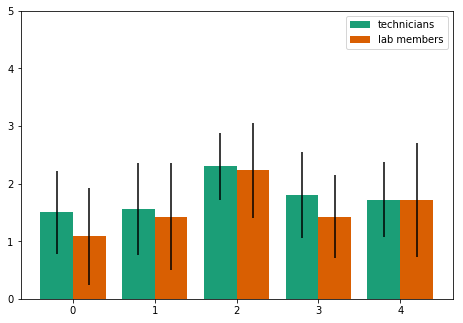

In [94]:
plot_bar(X_tec, X_lab, e_tec, e_lab, 'perception')

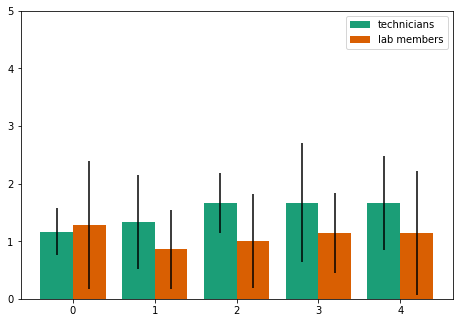

In [95]:
plot_bar(X_tec_anth, X_lab_anth, e_tec_anth, e_lab_anth, 'anthropomorphism')

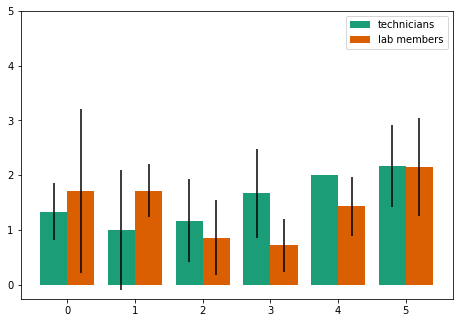

In [96]:
plot_bar(X_tec_anim, X_lab_anim, e_tec_anim, e_lab_anim, 'animacy')

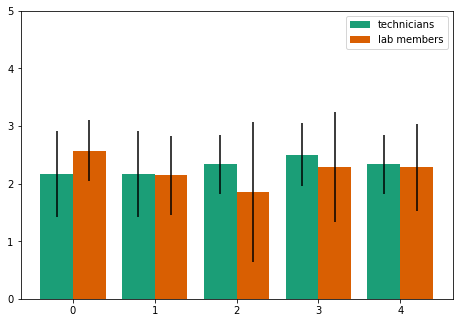

In [97]:
plot_bar(X_tec_like, X_lab_like, e_tec_like, e_lab_like, 'likeability')

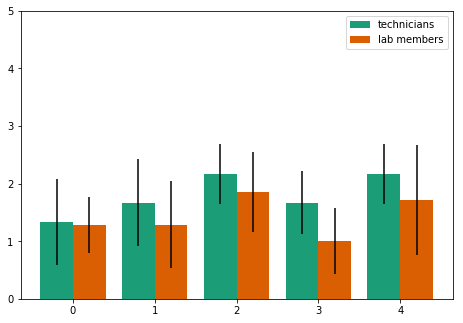

In [98]:
plot_bar(X_tec_intel, X_lab_intel, e_tec_intel, e_lab_intel, 'intelligence')

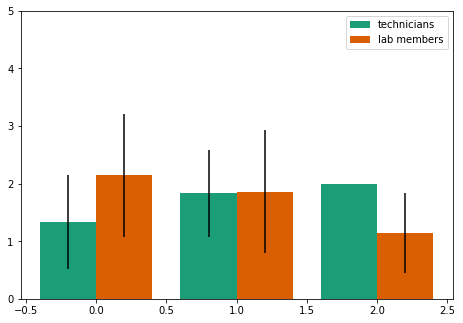

In [40]:
plot_bar(X_tec_safe, X_lab_safe, e_tec_safe, e_lab_safe, 'safety')

In [41]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==2].iloc[:, -24:] - 1

In [42]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
(LIKE3  LIKE5    1.000000
INT2   INT4     1.000000
LIKE4  INT2     0.894427
ANI2   INT1     0.894427
LIKE4  INT4     0.894427
       INT1     0.894427
ANT3   ANT4     0.875000
ANT2   ANT4     0.869626
LIKE1  SAFE1    0.867722
LIKE2  LIKE3    0.857493
dtype: float64, ANI4   LIKE5   -0.632456
       LIKE3   -0.632456
LIKE2  SAFE2   -0.647059
ANI1   ANI3    -0.685994
ANT2   ANI3    -0.759257
ANI3   INT5    -0.759257
       ANI6    -0.764706
ANT3   ANI3    -0.857493
ANI3   ANI4    -0.867722
ANT4   ANI3    -0.943242
dtype: float64)


In [43]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==3].iloc[:, -24:] - 1

In [44]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
(ANT1   ANT3     0.917249
ANT3   ANT4     0.887412
INT2   SAFE2    0.883883
ANT4   INT2     0.867227
ANI1   LIKE1    0.863462
ANI3   ANI4     0.848528
INT4   SAFE3    0.836660
ANT4   INT4     0.836660
ANT3   ANI4     0.836660
LIKE2  LIKE3    0.823545
dtype: float64, INT4  SAFE1   -0.810093
ANT2  LIKE3   -0.823545
INT1  INT3    -0.848528
ANI4  SAFE1   -0.867227
INT1  INT5    -0.872082
ANT1  SAFE1   -0.880705
INT2  SAFE1   -0.883883
ANT4  SAFE1   -0.935971
ANT3  SAFE1   -0.954703
ANT2  LIKE2   -1.000000
dtype: float64)


In [45]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"].isin([2,3])].iloc[:, -24:] - 1

In [46]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
(INT2   INT4     0.879599
ANT3   ANT4     0.824322
LIKE3  LIKE5    0.788663
LIKE4  LIKE5    0.767959
LIKE3  LIKE4    0.752420
ANT3   ANI4     0.746203
ANT4   ANI4     0.745665
LIKE2  LIKE3    0.741402
ANI1   LIKE1    0.717314
ANT2   ANT4     0.708371
dtype: float64, ANT5   LIKE5   -0.486834
ANT1   SAFE1   -0.524901
SAFE1  SAFE3   -0.546463
ANT1   LIKE3   -0.549102
ANT5   LIKE3   -0.580434
ANI3   SAFE1   -0.581843
ANT5   SAFE1   -0.586339
ANI3   ANI6    -0.588784
SAFE1  SAFE2   -0.591608
ANT3   SAFE1   -0.665772
dtype: float64)


# Usability results

In [47]:
csv_folder = '../data/surveys'
csv_files = [join(csv_folder, 'usability.csv')]

In [48]:
data_handler_use = DatasetHandler(csv_files, colors_list)

In [49]:
# Set up an application
handler = FunctionHandler(data_handler_use.modify_doc)
app = Application(handler)

In [50]:
show(app)

In [51]:
data = data_handler_use.dataset[data_handler_use.dataset["group"]==2].iloc[:,-10:]
odd_data = data.iloc[:,[0,2,4,6,8]] - 1
even_data = 5 - data.iloc[:,[1,3,5,7,9]]
data = pd.concat([odd_data, even_data], axis=1, sort=False)
data = data.sort_index(axis=1)

In [52]:
score = data.sum(axis=1)*2.5
print(np.mean(score), np.std(score))

54.166666666666664 11.426091000668407


In [53]:
X_tec = data.mean()[np.array([0,2,3,4,5,6,7,8,9,1])]
e_tec = data.std()[np.array([0,2,3,4,5,6,7,8,9,1])]

In [54]:
print(np.argmin(data.mean()), np.min(data.mean()))
print(np.argmax(data.mean()), np.max(data.mean()))

SUS9 1.6666666666666667
SUS10 2.8333333333333335


In [55]:
print(data['SUS2'].mean(), data['SUS2'].std())

2.1666666666666665 1.4719601443879744


In [56]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 5))

Top Absolute Correlations
(SUS5   SUS7    0.647059
SUS1   SUS2    0.617940
SUS2   SUS4    0.607644
SUS7   SUS9    0.600245
SUS10  SUS9    0.564076
dtype: float64, SUS2  SUS6   -0.610170
      SUS5   -0.752071
SUS6  SUS8   -0.774597
SUS4  SUS7   -0.891133
      SUS5   -0.891133
dtype: float64)


In [57]:
data = data_handler_use.dataset[data_handler_use.dataset["group"]==3].iloc[:,-10:]
odd_data = data.iloc[:,[0,2,4,6,8]] - 1
even_data = 5 - data.iloc[:,[1,3,5,7,9]]
data = pd.concat([odd_data, even_data], axis=1, sort=False)
data = data.sort_index(axis=1)

In [58]:
score = data.sum(axis=1)*2.5
print(np.mean(score), np.std(score))

47.5 14.015297764534703


In [59]:
print(np.argmin(data.mean()), np.min(data.mean()))
print(np.argmax(data.mean()), np.max(data.mean()))

SUS7 1.0
SUS10 2.857142857142857


In [60]:
X_lab = data.mean()[np.array([0,2,3,4,5,6,7,8,9,1])]
e_lab = data.std()[np.array([0,2,3,4,5,6,7,8,9,1])]

In [61]:
print(data['SUS2'].mean(), data['SUS2'].std())

1.4285714285714286 1.2724180205607034


In [62]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 5))

Top Absolute Correlations
(SUS3  SUS9    0.806747
SUS2  SUS7    0.794050
SUS4  SUS7    0.763763
      SUS5    0.746816
SUS2  SUS4    0.726108
dtype: float64, SUS7  SUS9   -0.389156
SUS1  SUS5   -0.451869
SUS6  SUS9   -0.543928
SUS1  SUS6   -0.543928
      SUS8   -0.806226
dtype: float64)


In [63]:
data = data_handler_use.dataset[data_handler_use.dataset["group"].isin([2,3])].iloc[:,-10:]
odd_data = data.iloc[:,[0,2,4,6,8]] - 1
even_data = 5 - data.iloc[:,[1,3,5,7,9]]
data = pd.concat([odd_data, even_data], axis=1, sort=False)

In [64]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 5))

Top Absolute Correlations
(SUS2  SUS4     0.682430
SUS5  SUS6     0.541207
SUS9  SUS10    0.494168
SUS3  SUS10    0.442232
SUS2  SUS10    0.414904
dtype: float64, SUS1  SUS8   -0.299537
      SUS5   -0.320496
SUS9  SUS8   -0.361359
SUS2  SUS6   -0.402751
SUS1  SUS6   -0.537693
dtype: float64)


In [65]:
score = data.sum(axis=1)*2.5
print(np.mean(score), np.std(score))

50.57692307692308 13.30680299385092


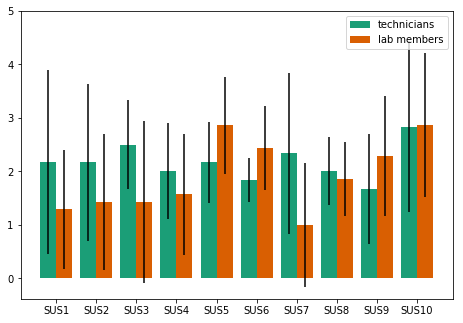

In [66]:
plt.bar(np.arange(len(X_tec)), X_tec, width=-0.4, align='edge', label='technicians', color='#1b9e77')
plt.errorbar(np.arange(len(X_tec))-0.2, X_tec, yerr=e_tec, fmt='none', color='black', capthick=2)

plt.bar(np.arange(len(X_lab)), X_lab, width=0.4, align='edge', label='lab members', color='#d95f02')
plt.errorbar(np.arange(len(X_lab))+0.2, X_lab, yerr=e_lab, fmt='none', color='black', capthick=2)

plt.xticks(np.arange(len(X_tec)), ('SUS' + str(i) for i in range(1,11)))
plt.ylim(top=5)
plt.legend()

plt.gca().set_position([0, 0, 1, 1])
plt.savefig("usability.svg")

In [67]:
data_percept = data_handler_percep.dataset[data_handler_percep.dataset['type'] == 1]
data_percept = data_percept[data_percept['group'].isin([2,3])].sort_values('ID')

In [68]:
data_percept = pd.concat([data_percept['group'], data_percept.iloc[:,-24:]], axis=1, sort=False)
data_percept = data_percept.reset_index()

In [69]:
data_use = data_handler_use.dataset[data_handler_use.dataset['group'].isin([2,3])].sort_values('ID').iloc[:,-10:]
data_use = data_use.reset_index().iloc[:,1:]

In [70]:
data_corr = pd.concat([data_percept, data_use], axis=1, sort=False)

In [71]:
data_corr_tec = data_corr[data_corr['group'] == 2].iloc[:,-35:]
data_corr_lab = data_corr[data_corr['group'] == 3].iloc[:,-35:]

In [72]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data_corr_tec, 10))

Top Absolute Correlations
(ANT1   SUS6     1.000000
LIKE3  LIKE5    1.000000
INT2   INT4     1.000000
ANT5   SUS2     0.942990
LIKE4  INT1     0.894427
ANI2   INT1     0.894427
LIKE4  INT4     0.894427
       INT2     0.894427
SUS4   SUS5     0.891133
       SUS7     0.891133
dtype: float64, SUS6   SUS8   -0.774597
ANI6   SUS3   -0.793884
SAFE2  SUS9   -0.857493
ANT3   ANI3   -0.857493
ANI3   ANI4   -0.867722
ANT2   SUS3   -0.878310
ANT3   SUS3   -0.925820
ANT4   SUS3   -0.925820
       ANI3   -0.943242
ANI4   SUS1   -0.948091
dtype: float64)


In [73]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data_corr_lab, 10))

Top Absolute Correlations
(SAFE2  SUS8     0.935971
ANT1   ANT3     0.917249
INT1   SUS7     0.887412
ANT3   ANT4     0.887412
INT2   SAFE2    0.883883
SAFE2  SUS1     0.880705
INT2   SUS1     0.877515
ANT5   SUS8     0.871421
INT1   SUS5     0.867722
ANT4   INT2     0.867227
dtype: float64, INT1  INT5    -0.872082
ANT1  SAFE1   -0.880705
INT2  SAFE1   -0.883883
ANI5  SUS4    -0.903525
      SUS2    -0.910182
INT5  SUS7    -0.910465
ANT4  SAFE1   -0.935971
ANT3  SAFE1   -0.954703
ANI6  SUS10   -0.983612
ANT2  LIKE2   -1.000000
dtype: float64)


In [74]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data_corr, 10))

Top Absolute Correlations
(INT2   INT4     0.879599
index  group    0.860934
ANT3   ANT4     0.824322
LIKE3  LIKE5    0.788663
LIKE4  LIKE5    0.767959
LIKE3  LIKE4    0.752420
SAFE3  SUS6     0.747146
ANT3   ANI4     0.746203
ANT4   ANI4     0.745665
LIKE2  LIKE3    0.741402
dtype: float64, ANI3   ANI6    -0.588784
SAFE1  SAFE2   -0.591608
group  ANI4    -0.617213
       ANI5    -0.617213
index  SUS6    -0.634068
ANI5   SUS2    -0.645942
ANT3   SAFE1   -0.665772
group  SAFE3   -0.673633
ANI5   SUS4    -0.698336
index  SAFE3   -0.850977
dtype: float64)
